$\mathbf{\text{Задача 1}}$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def Jacoby_solver(A, f, eps, N_ITER_MAX=int(1e5)):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_old = np.array(np.zeros(n))
    x_new = np.array(np.zeros(n))
    iters = 0
    for _ in range(N_ITER_MAX):
        iters += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j != i:
                    tmp += A[i, j] * x_old[j]
            x_new[i] = 1 / A[i, i] * (f[i] - tmp)
        if np.linalg.norm(x_new - x_old) < eps:
            break
        x_old = x_new.copy()
    return x_new, iters

In [35]:
A = [
    [2, 1, -1],
    [1, -2, 1],
    [1, 0, 2]
]
f = [9, 3, 2]
x, n_it = Jacoby_solver(A, f, 0.0001)
print(np.array(A)@x.reshape(3, 1))
print(n_it)

[[9.00006582]
 [3.00005291]
 [2.00006865]]
38


In [36]:
def generate_problem(alpha, n):
    # точное решение данной задачи - еденичный вектор
    A = np.zeros([n, n])
    for i in range(n):
        A[i, i] = 2
        if i != n - 1:
            A[i, i + 1] = -1 - alpha
        if i != 0:
            A[i, i - 1] = -1 + alpha
    f = np.zeros(n)
    f[0] = 1 - alpha
    f[n - 1] = 1 + alpha
    return A, f

In [38]:
A, f = generate_problem(0.1, 4)
Jacoby_solver(A, f, 0.001)

(array([0.99839327, 0.99777009, 0.99787294, 0.99887241]), 29)

Исследуем скорость схождения от n и $\alpha$

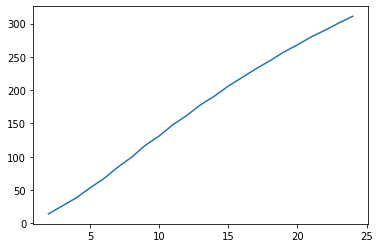

In [42]:
# зависимость от n
results = []
alpha = 0.2
N = 25
for i in range(2, N):
    A, f = generate_problem(alpha, i)
    x, n_iter = Jacoby_solver(A, f, 0.0001)
    results.append(n_iter)
plt.plot(np.array(range(2, N)), results)

Наблюдается линейный рост числа итераций

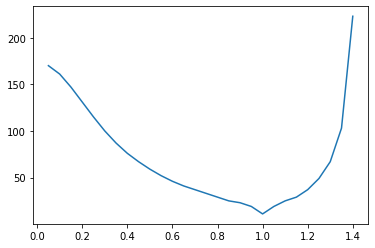

In [76]:
# зависимость от alpha
results = []
alpha0 = 0.05
n = 10
N = 29
for i in range(1, N):
    A, f = generate_problem(alpha0 * i, n)
    x, n_iter = Jacoby_solver(A, f, 0.0001)
    results.append(n_iter)
plt.plot(np.array(range(1, N)) * alpha0, results)

Пока $\alpha < 1$, наблюдается спад числа итераций. После достижения еденицы наблюдается резкий рост и при $\alpha = 1.5$ метод Якоби "разваливается".

$\mathbf{\text{Задача 2}}$

Напишем итерационный метод Зейделя и сравним на примере этой же системы с методом Якоби

In [53]:
def Zeidel_solver(A, f, eps, N_ITER_MAX=int(1e5)):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_old = np.array(np.zeros(n))
    x_new = np.array(np.zeros(n))
    iters = 0
    for _ in range(N_ITER_MAX):
        iters += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_old[j]
                if j < i:
                    tmp += A[i, j] * x_new[j]
            x_new[i] = 1 / A[i, i] * (f[i] - tmp)
        if np.linalg.norm(x_new - x_old) < eps:
            break
        x_old = x_new.copy()
    return x_new, iters

In [56]:
A, f = generate_problem(0.1, 4)
Zeidel_solver(A, f, 0.001)

(array([0.999079  , 0.99891496, 0.99920996, 0.99964448]), 17)

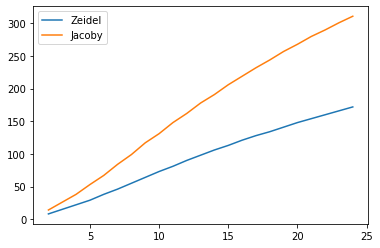

In [61]:
# зависимость от n для методов Зейделя и Якоби на одном графике
resultsJ = []
resultsZ = []
alpha = 0.2
N = 25
for i in range(2, N):
    A, f = generate_problem(alpha, i)
    x, n_iter = Zeidel_solver(A, f, 0.0001)
    resultsZ.append(n_iter)
    x, n_iter = Jacoby_solver(A, f, 0.0001)
    resultsJ.append(n_iter)
plt.plot(np.array(range(2, N)), resultsZ, label='Zeidel')
plt.plot(np.array(range(2, N)), resultsJ, label='Jacoby')
plt.legend()

Как видно, для данной задачи метод Зейделя работает приблизительно в два раза быстрее, чем метод Якоби

$\mathbf{\text{Задача 5}}$

Напишем метод релаксации

In [63]:
def relaxed_solver(A, f, tau, eps, N_ITER_MAX=int(1e5)):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_old = np.array(np.zeros(n))
    x_new = np.array(np.zeros(n))
    iters = 0
    for _ in range(N_ITER_MAX):
        iters += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_old[j]
                if j < i:
                    tmp += A[i, j] * x_new[j]
            x_new[i] = 1 / A[i, i] * (f[i] - tmp)
        if np.linalg.norm(x_new - x_old) < eps:
            break
        x_new = x_new * tau + x_old * (1 - tau)
        x_old = x_new.copy()
    return x_new, iters

In [72]:
A, f = generate_problem(0.1, 4)
relaxed_solver(A, f, 1, 0.001)

(array([0.999079  , 0.99891496, 0.99920996, 0.99964448]), 17)

При фиксированных n и $\alpha$ исследуем зависимость числа итераций от $\tau$

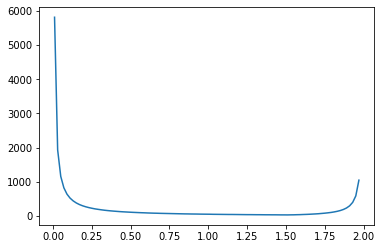

In [86]:
results = []
alpha = 0.2
tau0 = 0.01
n = 8
A, f = generate_problem(alpha, n)
for i in range(1, 199, 2):
    x, n_iter = relaxed_solver(A, f, tau0 * i ,0.0001)
    results.append(n_iter)
plt.plot(np.array(range(1, 199, 2))*tau0, results)

Уберем из рассмотрения края интервала (0, 2), где $\tau$ явно неудачно

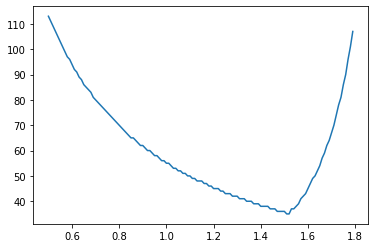

In [84]:
results = []
alpha = 0.2
tau0 = 0.01
n = 8
A, f = generate_problem(alpha, n)
for i in range(50, 180, 1):
    x, n_iter = relaxed_solver(A, f, tau0 * i ,0.0001)
    results.append(n_iter)
plt.plot(np.array(range(50, 180, 1)) * tau0, results)

Как видно, минимум достигается для $\tau \sim 1.5$.
Напишем функцию, ищущую оптимальное $\tau$ и исследуем зависимость оптимального $\tau$ от n и $\alpha$.

In [87]:
def best_tau(n, alpha):
    results = []
    tau0 = 0.01
    for i in range(1, 199, 1):
        A, f = generate_problem(alpha, n)
        x, n_iter = relaxed_solver(A, f, tau0 * i ,0.0001)
        results.append(n_iter)
    return np.argmin(np.array(results)) * tau0

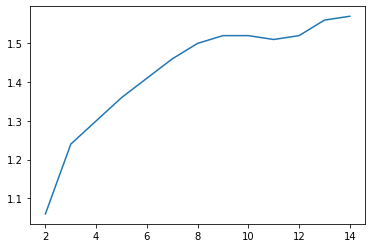

In [92]:
# зависимость лучшего tau от n
results = []
alpha = 0.2
N = 15
for i in range(2, N):
    results.append(best_tau(i, alpha))
plt.plot(np.array(range(2, N)), results)

Вычилсения получаются довольно долгими чтобы провести исследования для больших n, но наблюдается стремление к $\tau \sim 1.6$

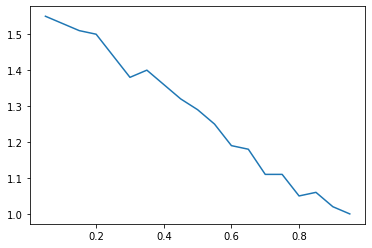

In [97]:
# зависимость лучшего tau от 0 < alpha <= 1
results = []
alpha0 = 0.05
n = 8
for i in range(1, 20):
    results.append(best_tau(n, alpha0 * i))
plt.plot(np.array(range(1, 20)) * alpha0 , results)

Видно, что в среднем, с ростом $\alpha$, параметр $\tau$ уменьшается до 1

$\mathbf{\text{Задача 4}}$

Рассмотрим еще один тип двухслойной итерационной схемы: $(L +  D)\frac{x^{(k + 1)} - x^{(k)}}{\tau} + Ax^{(k)} = f$

In [99]:
def tau_solver(A, f, tau, eps, N_ITER_MAX=int(1e5)):
    f = np.array(f)
    A = np.array(A)
    n = f.shape[0]
    x_old = np.array(np.zeros(n))
    x_new = np.array(np.zeros(n))
    iters = 0
    for _ in range(N_ITER_MAX):
        iters += 1
        for i in range(n):
            tmp = 0.0
            for j in range(n):
                if j > i:
                    tmp += A[i, j] * x_old[j] * tau
                if j < i:
                    tmp = tmp + A[i, j] * (x_new[j] - x_old[j] * (1 - tau))
                if j == i:
                    tmp -= A[i, j] * x_old[j] * (1 - tau)
            x_new[i] = 1 / A[i, i] * (f[i] * tau - tmp)
        if np.linalg.norm(x_new - x_old) < eps:
            break
        x_old = x_new.copy()
    return x_new, iters

In [106]:
A, f = generate_problem(0.1, 4)
tau_solver(A, f, 1.5, 0.001)

(array([1.00023115, 0.99998733, 1.00000295, 0.99999923]), 18)

Повторим вычисления из задачи 5 для этого метода

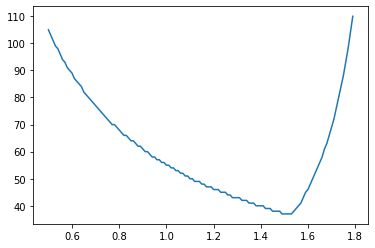

In [109]:
results = []
alpha = 0.2
tau0 = 0.01
n = 8
A, f = generate_problem(alpha, n)
for i in range(50, 180, 1):
    x, n_iter = tau_solver(A, f, tau0 * i ,0.0001)
    results.append(n_iter)
plt.plot(np.array(range(50, 180, 1)) * tau0, results)

In [110]:
def best_tau2(n, alpha):
    results = []
    tau0 = 0.01
    for i in range(1, 199, 1):
        A, f = generate_problem(alpha, n)
        x, n_iter = tau_solver(A, f, tau0 * i ,0.0001)
        results.append(n_iter)
    return np.argmin(np.array(results)) * tau0

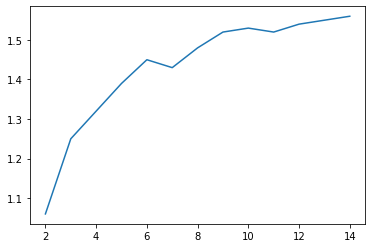

In [111]:
# зависимость лучшего tau от n
results = []
alpha = 0.2
N = 15
for i in range(2, N):
    results.append(best_tau2(i, alpha))
plt.plot(np.array(range(2, N)), results)

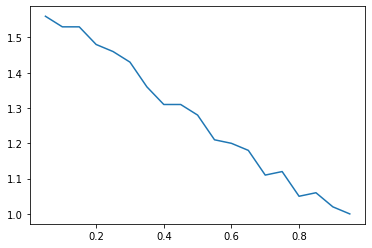

In [112]:
# зависимость лучшего tau от 0 < alpha <= 1
results = []
alpha0 = 0.05
n = 8
for i in range(1, 20):
    results.append(best_tau2(n, alpha0 * i))
plt.plot(np.array(range(1, 20)) * alpha0 , results)

Как видно, результаты работы методов из задачи 5 и задачи 4 для данной системы различаются незначительно